# TWITTER PROJECT
## PART I: VIRAL TWEETS CLASSIFICATION USING A SUPERVISED MACHINE LEARNING  ALGORITHM
### INTRODUCTION

This project uses a K-Nearest Neighbor classification algorithm to predict whether a tweet will go viral.
Initially, a broad definition of a ’ viral’ tweet is established as one which has been ‘shared more times than 10 times the user’s followers count’. The reader should note that this definition is arbitrary. 

### SCOPE
#### <u>GOALS</u>

1. Use a K-Nearest Neighbor classifier to predict whether a tweet will go viral to 95% accuracy
2. Determine which features of a tweet are most likely to cause a tweet to go viral:
	i. number of hashtags in the tweet;
	ii. number of words or characters;
	iii. number of links;
	iv. number of followers the user has;
	v. specific language used;
	vi. number of user mentions.

#### <u>ACTIONS</u>

1. Using the features that have the strongest correlation to whether a tweet will go viral, write a tweet, which the K-Nearest Neighbor classifier will predict to go viral.
2. Post the tweet to see whether it will, indeed, go viral.

#### <u>DATA</u>

**1. Where is the data sourced from?**<br>

- The data was sourced from Twitter and accessed through Codecademy’s Data Science Career Path.

**2. How is the data stored?**<br>

- The data is store in raw format as a single JSON file.

**3. What are the columns in the data?**<br>

- There are 31 columns in the original dataframe, which are as follows:

['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id’, ‘in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name’, 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count’, 'favorite_count', 'favorited', 'retweeted', 'lang', 'possibly_sensitive', 'quoted_status_id', 'quoted_status_id_str’, 'extended_entities', 'quoted_status', 'withheld_in_countries']

**4. How many entries are there in total?**<br>

- There are 11,099 entries

**5. Is there missing information?**<br>

- The data doesn’t contain any missing information.
- Those columns, which contain features that a tweet doesn’t necessarily have to have, do contain NaN cells. For example, if a tweet is not a retweet of someone else’s tweet the retweeted_status column cell would contain a NaN.

**6. Level of granularity of the data?**<br>

- The data is very granular, and contains a lot of detail about each tweet, the tweet’s user, and those users, whose tweets were retweeted.

**7. How far back does the data go?**<br>

- The data is a 28 second snapshot of tweets created between 2018-07-31 13:34:13 and 2018-07-31 13:34:40 UTS. There are 28 unique date-times for the 11,099 tweets.

**8. How often is the data collected?**<br>

- The data was collected each second between 2018-07-31 13:34:13 and 2018-07-31 13:34:40 UTS.

**9. How often does new data come in?**<br>

- No new data is added to the dataframe.

**10. Does new data overwrite old fields or does is add new rows?**<br>

- NA.

**11. Is there a collection bias in the data?**<br>

- It is likely that a collection bias exists, given that all 11,099 tweets are from the same 28 seconds in the same timezone. This is because world events and news reports can heavily influence the content of world-wide twitter conversations at any one time.
- There are only 17 row entries, which contain geolocation information. For those 17 entries, the following coordinates are stated:

[20.21, 102.62]
[51.40966808, -0.30390349]
[44.26928641, -76.51193182]
[45.2029, -93.387]
[64.1333, -21.9333]
[35.7795897, -78.6381787]
[39.90854909, 116.47548753]
[50.82111066, -0.14220751]
[42.5459227, -71.9106308]
[19.2, -96.1333]
[26.3582748, -81.7458845]
[37.60024833, -0.80567856]
[52.518391, 13.401251]
[9.0, 8.0]
[43.7166, -79.3407]
[33.7489954, -84.3879824]
[37.80559334, -122.41312804]

- This small sample has users from all over the world, indicating that there is unlikely to be any location bias in the rest of the data despite absence of location data.

#### <u>ANALYSIS</u>

1. Distribution of retweet count for each tweet
2. Analysis and creation of additional features
	2.1. Correlation between followers/ friends count and retweeted count
	2.2 Bar chart of average retweet count per number of hashtags
	2.3 Bar chart of average retweet count per number of links
	2.4 Bar chart of average retweet count per number of user mentions
3. KNN classification model analysis with the above features
4. Analysis of specific language used with natural language processing
5. Correlation between specific language and retweeted count
6. Design of viral tweet

### CONCLUSIONS

- The maximum retweet count in the dataset is 413,719 with the average being 2,77.96 retweets. The median retweet count is 13. The number of tweets with a retweet count over 100,000 is 24.<br><br>
- For a definition of ‘viral’ - ‘a tweet, which has been shared more than 10 times the user’s followers count, for followers count equal to or greater than 100’, there were 860 tweets, which were labeled ‘viral’.<br><br>
- There was a weak-positive to no statistically significant correlation between a user’s followers count and the retweet count they receive on their tweet, with Pearson’s correlation coefficient = 0.2914.<br><br>
- Viral tweets with the highest average retweet count tend to have one or more of the following characteristics: zero hashtags, one link, and/ or one user mention.<br><br>
- Using features: ['user_followers_count', 'full_character_count', 'num_of_words', 'num_of_hashtags', 'num_of_links', 'num_of_user_mentions’], a KNN model accuracy score of 92.03% for k = 6 was achieved. This was the highest possible score for all possible combinations of selected features.

### FEATURES ANALYSIS
#### <u>Probing The Data</u>

In [1]:
import pandas as pd

all_tweets = pd.read_json("random_tweets.json", lines = True)

#print('DF LENGTH\n', len(all_tweets), '\n')
#print('COLUMNS\n', all_tweets.columns, '\n')
#print('ith INDEX FULL TWEET DATA\n', all_tweets.iloc[0], '\n')
#print('ith INDEX TWEET TEXT\n', all_tweets.loc[0]['text'], '\n')
#print('ith INDEX TWEET USER\n', all_tweets.loc[0]['user'], '\n')
#print('ith INDEX TWEET ENTITIES\n', all_tweets.loc[0]['entities'], '\n')
#print('ith INDEX TWEET METADATA\n', all_tweets.loc[0]['metadata'], '\n')
#print('ith INDEX TWEET RETWEETED STATUS\n', all_tweets.loc[0]['retweeted_status'], \
#'\n')

#rows where withheld_in_countires is NOT(~) null in dict format:
#print('ROWS WHERE withheld_in_countires IS NOT(~) NULL:\n', \
#all_tweets[~all_tweets.withheld_in_countries.isnull()].to_dict(), '\n')
#entries at index 1800 and 3261 are both withheld in countries DE and FR\
#--> racially sensitive content

#rows for possibly sensitive tweets:
#print('ROWS FOR POSSIBLY SENSITIVE TWEETS:\n', \
#all_tweets[~all_tweets.possibly_sensitive.isnull()].possibly_sensitive.head(20), '\n')

#geo = all_tweets.geo[all_tweets.geo.notnull()].reset_index(drop = True)
#for i in range(17):
#    print(geo[i]['coordinates'])
#print('\n')

#print('Is Null? Value Counts:')
#for column in list(all_tweets.columns):
#    print(all_tweets[column].isnull().value_counts(), '\n')

#print('Min and Max values of the tweet dates:')
#print(all_tweets.created_at.min())
#print(all_tweets.created_at.max(), '\n')
#print(all_tweets.created_at.unique(), '\n')

#print('Unique geolocations:')
#print(all_tweets.geo[2000:2050])

#### <u>Defining 'Viral'</u>

The K-Nearest Neighbor classifier is a supervised machine learning algorithm, which means it needs to have a labeled dataset to work with. Since this dataset does not have a feature, which classifies tweets as viral or not viral, this firstly needs to be defined and created before the KNN model can be put to use. There is no objective definition of what consitutes a 'viral' tweet. A tweet can be considered viral if:<br><br>
- It has been retweeted by more than 1000 people;
- It has been shared more times than a certain pre-defined factor of the user's followers count.<br><br>

There is a problem with using the first definition, because for someone who has 3 followers, a tweet with 1000 retweets could be considered viral, while for someone who has 1 million followers, 1000 retweets could be considered as a less than popular tweet.
Equally, if one chooses to define a 'viral' tweet as the number of retweets, which is more than some pre-defined factor of the user's followers count, then this, also, is arbitrary.

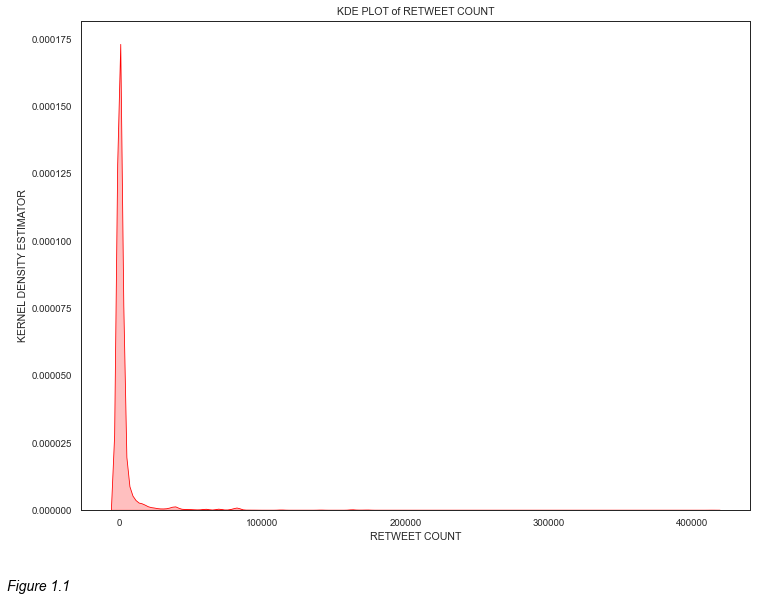

Maximum retweet count:  413719
Average retweet count:  2777.95639246779
Median retweet count:  13.0 

Over 100,000 retweets:
0    11075
1       24
Name: is_viral_100000, dtype: int64 

Retweeted more than 10 times the user's followers count:
0    10239
1      860
Name: is_viral_followers_factor, dtype: int64 



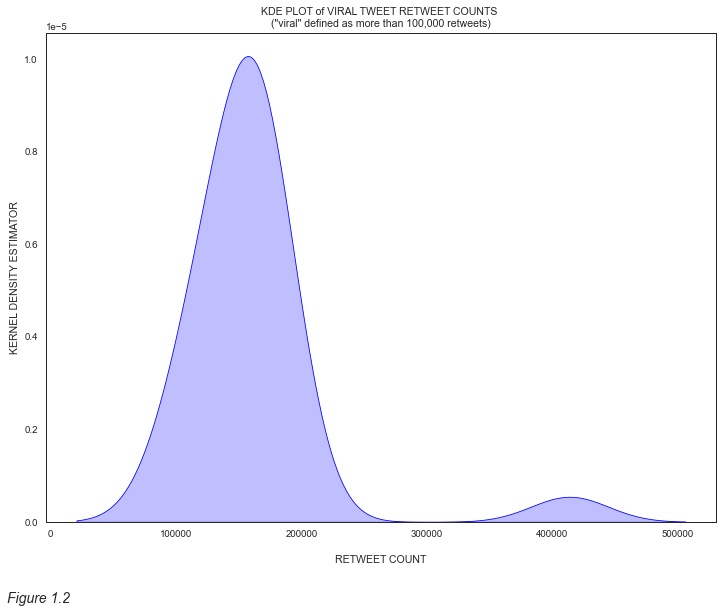

There are only 24 tweets in the dataset, with retweet count of >100,000. By this definition, those 24 tweets can be considered 'viral.


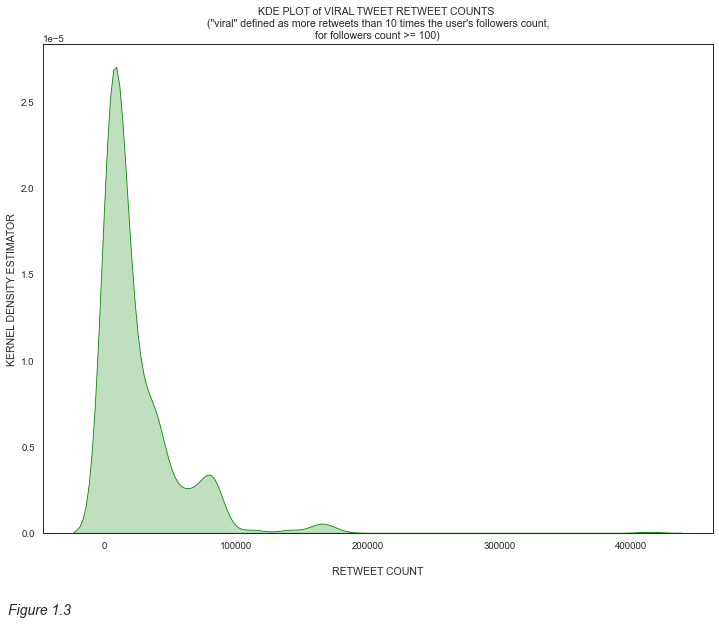

There are 860 tweets, which have been retweeted more than 10 times the user's followers count, hence by this definition, these 860 can also be considered 'viral'.


The vast majority of tweets have a retweet count close to zero.


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_context('paper', font_scale = 1.1)

def retweet_count_kde():
    f = plt.figure(figsize = (12, 9))
    text = 'Figure 1.1'
    plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

    sns.set_style('white')
    sns.despine(top = False, right = False)

    sns.kdeplot(all_tweets.retweet_count, color = 'red', shade = True)

    plt.title('KDE PLOT of RETWEET COUNT')
    plt.xlabel('RETWEET COUNT')
    plt.ylabel('KERNEL DENSITY ESTIMATOR')
    
    plt.show()

retweet_count_kde()
#right skewed distribution

print('Maximum retweet count: ', all_tweets.retweet_count.max())
print('Average retweet count: ', all_tweets.retweet_count.mean())
print('Median retweet count: ', all_tweets.retweet_count.median(), '\n')

#friends and followers:
all_tweets['user_followers_count'] = all_tweets.apply(lambda tweet: tweet.user['followers_count'], axis = 1)
all_tweets['user_friends_count'] = all_tweets.apply(lambda tweet: tweet.user['friends_count'], axis = 1)

#viral tweet defined as 'retweeted more than 100,000 times':
all_tweets['is_viral_100000'] = np.where(all_tweets['retweet_count'] > 100000, 1, 0)
print('Over 100,000 retweets:')
print(all_tweets.is_viral_100000.value_counts(), '\n')

#viral tweet defined as 'retweeted more times than 10 times the user's followers count for followers count >= 100':
all_tweets['is_viral_followers_factor'] = all_tweets.apply(lambda tweet: 1 if tweet['user_followers_count'] >= 100 and tweet['retweet_count'] > 10*tweet['user_followers_count'] else 0, axis = 1)
print('Retweeted more than 10 times the user\'s followers count:')
print(all_tweets.is_viral_followers_factor.value_counts(), '\n')

def viral_tweet_100000():
    data = all_tweets[all_tweets['is_viral_100000'] == 1]
    
    f = plt.figure(figsize = (12, 9))
    text = 'Figure 1.2'
    plt.figtext(0.08, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

    sns.kdeplot(data.retweet_count, color = 'blue', shade = True)

    plt.title('KDE PLOT of VIRAL TWEET RETWEET COUNTS \n("viral" defined as more than 100,000 retweets)')
    plt.xlabel(' \nRETWEET COUNT')
    plt.ylabel('KERNEL DENSITY ESTIMATOR')
    
    plt.show()

viral_tweet_100000()


print("There are only 24 tweets in the dataset, with retweet count of >100,000. By this definition, those 24 tweets can be considered 'viral.")

def viral_tweet_followers_count_proportion_kde():
    data = all_tweets[all_tweets['is_viral_followers_factor'] == 1]
    
    f = plt.figure(figsize = (12, 9))
    text = 'Figure 1.3'
    plt.figtext(0.085, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

    sns.kdeplot(data.retweet_count, color = 'green', shade = True)

    plt.title('KDE PLOT of VIRAL TWEET RETWEET COUNTS \n("viral" defined as more retweets than 10 times the user\'s followers count,\nfor followers count >= 100)')
    plt.xlabel(' \nRETWEET COUNT')
    plt.ylabel('KERNEL DENSITY ESTIMATOR')
    
    plt.show()

viral_tweet_followers_count_proportion_kde()

print("There are 860 tweets, which have been retweeted more than 10 times the user's followers count, hence by this definition, these 860 can also be considered 'viral'.\n\n")

print("The vast majority of tweets have a retweet count close to zero.")

It is not immediately clear, which definition of 'viral' is best suited for this analysis. Both seem equally arbitrary. For the sake of having 'enough' data to work with, it is best to chose to define 'viral' as 'more than 10 times the user's followers count (for followers count >= 100)', which gave 860 viral tweets.

#### <u>Creating Additional Features</u>

'Number of followers' and 'number of friends' features have already been created when labelling viral tweets.

With the definition of 'viral' established, the following tweet characteristics are analysed to determine which features can potentially make a tweet go viral:

- full characters count;
- number of words in the tweet;
- number of hashtags;
- number of links;
- number of user mentions;

In [212]:
#full tweet character count:
all_tweets['full_character_count'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis = 1)

#number of words in the tweet minus RT status, hashtags, user mentions, and links:
num_of_words = []
cleaned_tweets = []

num_of_hashtags = []
num_of_links = []

num_of_user_mentions = []
mentioned_user_followers = []

for i in range(len(all_tweets)):
    full_tweet_text = all_tweets.text[i].split()
    cleaned_tweet_text = []
    #hashtags, links:
    hashtags_count = 0
    links_count = 0
    #user mentions:
    user_mentions_count = 0
    mentioned_user_followers_count = 0
    
    if full_tweet_text[0] == 'RT':
        full_tweet_text.pop(0)
    
    for word in full_tweet_text:
        if '#' not in word and 'https://' not in word and '@' not in word:
            cleaned_tweet_text.append(word)
        if '#' in word:
            hashtags_count += 1
        if 'https://' in word:
            links_count += 1
        if '@' in word:
            user_mentions_count += 1
    
    num_of_hashtags.append(hashtags_count)
    num_of_links.append(links_count)
    num_of_user_mentions.append(user_mentions_count)
    num_of_words.append(len(cleaned_tweet_text))
    cleaned_tweets.append(cleaned_tweet_text)

all_tweets['no_hashtags_links_mentions'] = cleaned_tweets
all_tweets['num_of_words'] = num_of_words
all_tweets['num_of_hashtags'] = num_of_hashtags
all_tweets['num_of_links'] = num_of_links
all_tweets['num_of_user_mentions'] = num_of_user_mentions

print(all_tweets.columns)
#print(all_tweets.tweet_length.head(10))
#print(all_tweets.num_of_user_mentions.head(10))
#print(all_tweets.no_hashtags_links_mentions.head(10))
#print(all_tweets.followers_count.head(10))
#print(all_tweets.friends_count.head(10))
#print('number of words', num_of_words[:40])
#print('number of hashtags', num_hashtags[:40])
#print('number of links', num_links[:40])
#print('number of user mentions', num_user_mentions[:40], '\n')
#print(all_tweets.lang.unique())

#for i in range(40):
#    print(i, '\n')
#    print('TWEET', all_tweets.text.iloc[i].split(), '\n')
#    print(cleaned_tweets[i], '\n')
#    print('RT STATUS', all_tweets.retweeted_status.iloc[i], '\n')
#    print('HASHTAGS', all_tweets.entities[i]['hashtags'])
#    print('SYMBOLS', all_tweets.entities[i]['symbols'])
#    print('USER MENTIONS', all_tweets.entities[i]['user_mentions'])
#    print('URSL', all_tweets.entities[i]['urls'])
#    print('EXTENDED ENTITIES', all_tweets.extended_entities[i])
#    print('QUOTED STATUS', all_tweets.quoted_status[i])
#    print('IS QUOTE STATUS', all_tweets.is_quote_status[i], '\n\n')
#    print(all_tweets.in_reply_to_status_id[i])
#    print(all_tweets.in_reply_to_status_id_str[i])
#    print(all_tweets.in_reply_to_user_id[i])
#    print(all_tweets.in_reply_to_user_id_str[i])
#    print(all_tweets.in_reply_to_screen_name[i], '\n\n')

#print(all_tweets.is_viral_100000.head(10))
#print(all_tweets.is_viral_followers_count_proportion.head(10))

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'extended_entities', 'quoted_status',
       'withheld_in_countries', 'user_followers_count', 'user_friends_count',
       'is_viral_100000', 'is_viral_followers_factor', 'full_character_count',
       'no_hashtags_links_mentions', 'num_of_words', 'num_of_hashtags',
       'num_of_links', 'num_of_user_mentions', 'noise_removed'],
      dtype='object')
['en' 'tl' 'ja' 'fi' 'ko' 'und' 'nl' 'es' 'pt' 'in' 'ur' 'vi' 'it' 'th'
 'ca' 'fr' 'ru' 'el' 'ar' 'pl' 'ro' 'tr' 'sl' 'de' 'zh' 'fa' 'sv' 'et'
 '

### VISUALISING FEATURE RELATIONSHIPS

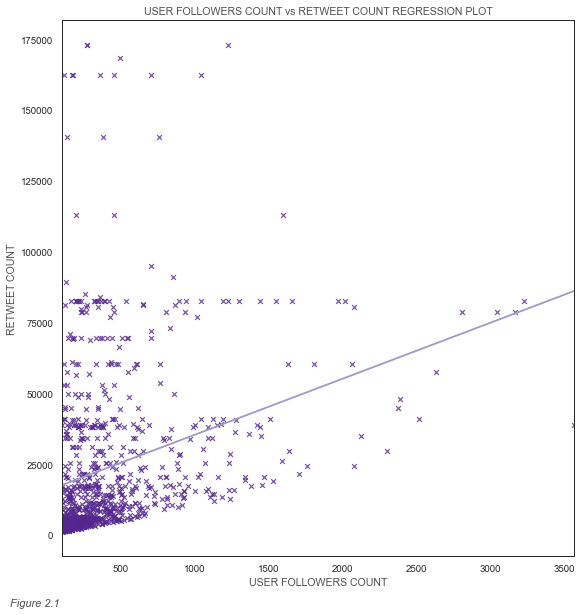

Correlation coefficient:  0.2914258715271926


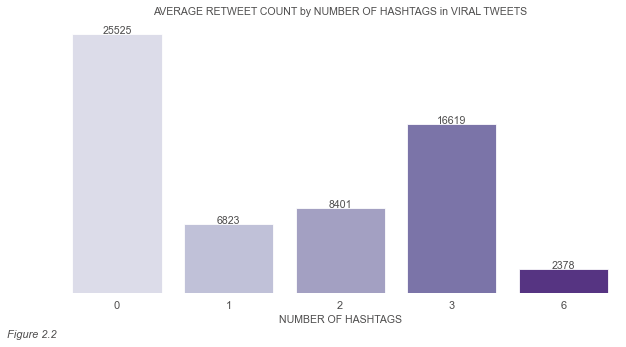

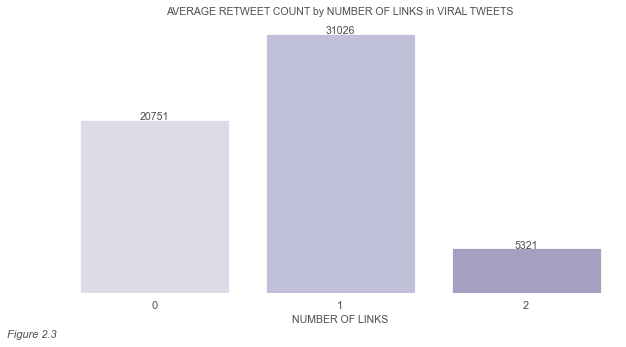

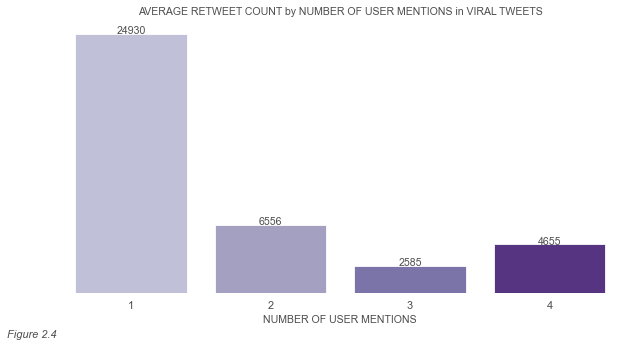

In [4]:
#correlation between user followers count and retweeted count:
from scipy.stats import pearsonr

def user_followers_retweet_count():
    data = all_tweets[(all_tweets.is_viral_followers_factor == 1) & (all_tweets.retweet_count < 400000)]

    sns.set_style('white')
    
    sns.lmplot(x = 'user_followers_count', y = 'retweet_count',\
               data = data, height = 8, aspect = 1, markers = 'x',\
               scatter_kws = {'color':'#54278f'}, line_kws = {'color':'#9e9ac8'}, ci = None)
    
    sns.despine(top = False, right = False)

    plt.text(-250.0, -25000.0, 'Figure 2.1', fontsize = 11, fontstyle = 'oblique', color = '#4f4e4e')

    plt.title('USER FOLLOWERS COUNT vs RETWEET COUNT REGRESSION PLOT', color = '#4f4e4e')
    plt.xlabel('USER FOLLOWERS COUNT', color = '#4f4e4e')
    plt.ylabel('RETWEET COUNT', color = '#4f4e4e')
    
    plt.show()
    
    correlation, p = pearsonr(data['user_followers_count'], data['retweet_count'])
    print('Correlation coefficient: ', correlation)

user_followers_retweet_count()
#correlation coefficient of 0.2914258715271926 indicates a weak linear association between the two variables

#bar plots of concrete numerical features (number of hastags, links, user mentions) and average retweet count:
def average_retweet_count_by_hashtags_barplot():
    f, ax = plt.subplots(figsize = (10, 5))

    sns.set_style('white')
    
    sns.barplot(x = 'num_of_hashtags', y = 'retweet_count',\
                palette = ['#dadaeb', '#bcbddc', '#9e9ac8', '#756bb1', '#54278f'],\
                data = all_tweets[(all_tweets.is_viral_followers_factor == 1) &\
                (all_tweets.retweet_count < 400000)], ci = None)
    
    sns.despine(bottom = True, left = True)
    
    plt.title('AVERAGE RETWEET COUNT by NUMBER OF HASHTAGS in VIRAL TWEETS', color = '#4f4e4e')
    plt.xlabel('NUMBER OF HASHTAGS', color = '#4f4e4e')
    plt.ylabel('')
    
    plt.xticks(fontsize = 11, color = '#4f4e4e')
    plt.yticks([], [])
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(x = p.get_x() + p.get_width()/2, y = height  + 0.2,\
                s = '{:.0f}'.format(height), ha = 'center', color = '#4f4e4e')
    
    plt.figtext(0.05, 0.0, 'Figure 2.2', fontsize = 11, fontstyle = 'oblique', color = '#4f4e4e')

    plt.show()

average_retweet_count_by_hashtags_barplot()

def average_retweet_count_by_links_barplot():
    f, ax = plt.subplots(figsize = (10, 5))

    sns.set_style('white')
    
    sns.barplot(x = 'num_of_links', y = 'retweet_count',\
                palette = ['#dadaeb', '#bcbddc', '#9e9ac8', '#756bb1', '#54278f'],\
                data = all_tweets[(all_tweets.is_viral_followers_factor == 1) &\
                (all_tweets.retweet_count < 400000)], ci = None)

    sns.despine(bottom = True, left = True)
    
    plt.title('AVERAGE RETWEET COUNT by NUMBER OF LINKS in VIRAL TWEETS', color = '#4f4e4e')
    plt.xlabel('NUMBER OF LINKS', color = '#4f4e4e')
    plt.ylabel('')
    
    plt.xticks(fontsize = 11, color = '#4f4e4e')
    plt.yticks([], [])
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(x = p.get_x() + p.get_width()/2, y = height  + 0.2,\
                s = '{:.0f}'.format(height), ha = 'center', color = '#4f4e4e')
    
    plt.figtext(0.05, 0.0, 'Figure 2.3', fontsize = 11, fontstyle = 'oblique', color = '#4f4e4e')

    plt.show()

average_retweet_count_by_links_barplot()

def average_retweet_count_by_user_mentions_barplot():
    f, ax = plt.subplots(figsize = (10, 5))
    
    sns.set_style('white')
    
    sns.barplot(x = 'num_of_user_mentions', y = 'retweet_count',\
                palette = ['#bcbddc', '#9e9ac8', '#756bb1', '#54278f'],\
                data = all_tweets[(all_tweets.is_viral_followers_factor == 1) &\
                (all_tweets.retweet_count < 400000)], ci = None)
    
    sns.despine(bottom = True, left = True)

    plt.title('AVERAGE RETWEET COUNT by NUMBER OF USER MENTIONS in VIRAL TWEETS', color = '#4f4e4e')
    plt.xlabel('NUMBER OF USER MENTIONS', color = '#4f4e4e')
    plt.ylabel('')
    
    plt.xticks(fontsize = 11, color = '#4f4e4e')
    plt.yticks([], [])
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(x = p.get_x() + p.get_width()/2, y = height  + 0.2,\
                s = '{:.0f}'.format(height), ha = 'center', color = '#4f4e4e')
    
    plt.figtext(0.05, 0.0, 'Figure 2.4', fontsize = 11, fontstyle = 'oblique', color = '#4f4e4e')

    plt.show()

average_retweet_count_by_user_mentions_barplot()

#average number of hashtags barplot has large error bars --> large spread of the data
#0 hashtags seems to correspond to the highest average number of retweets
#1 link has the highest avergae number of retweets
#1 user mention has the highest avergae numbe of retweets

### KNN CLASSIFIER
#### <u>Normalizing Data</u>

In order to be able to predict how each feature affects whether a tweet is viral or not, it is important to  normalize the features, so that each feature has the same weighting in the model.
Only those features that are useful for the KNN model are isolated, with is_viral_follower_factor labels placed in a separate dataframe.

In [479]:
from sklearn.preprocessing import StandardScaler

labels1 = all_tweets['is_viral_followers_factor']
features1 = all_tweets[['user_followers_count', 'user_friends_count', 'full_character_count', 'num_of_words',\
                      'num_of_hashtags', 'num_of_links', 'num_of_user_mentions']]

scaler1 = StandardScaler()
scaled_data1 = scaler1.fit_transform(features1)
print(scaled_data1[0])

[-0.02878298 -0.14483305  0.6164054   1.16761856 -0.3215084  -0.77064693
 -0.08781719]


####  <u>Fitting The Classifier With Training & Validation Data Sets</u>

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

train_set1, validate_set1, train_labels1, validate_labels1 =\
train_test_split(scaled_data1, labels, test_size = 0.2, random_state = 1)

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_set, train_labels)

score = classifier.score(validate_set, validate_labels)
print(score)

0.909009009009009


#### <u>Choosing The Best K</u>

To find the best value of nearest neighbours, k, a graph of k-value vs score is generated to find the peak score value.

In [160]:
import matplotlib.pyplot as plt

scores1 = []

for i in range(1, 101):
    classifier1 = KNeighborsClassifier(n_neighbors = i)
    classifier1.fit(train_set1, train_labels1)
    score1 = classifier1.score(validate_set1, validate_labels1)
    scores1.append(score1)
    
print('done')

done


0.9157657657657657
15
16


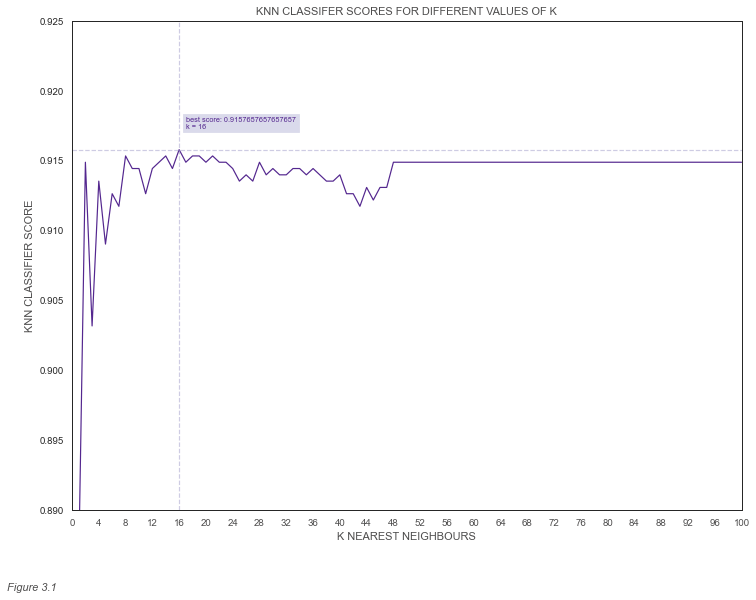

In [170]:
max_score1 = max(scores1)
max_score_index1 = scores.index(max_score1)
print(max_score1)
print(max_score_index1)
best_k1 = range(1, 101)[15]
print(best_k1)

def knn_scores(scores, best_k, max_score, figure):
    f, ax = plt.subplots(figsize = (12, 9))
    plt.xlim(0, 100)
    plt.ylim(0.890, 0.925)
    
    sns.set_style('white')
 
    sns.lineplot(x = range(1, 101), y = scores, color = '#54278f')
    
    plt.axhline(max(scores), color = '#9e9ac8', alpha = 0.5, linestyle = '--')
    plt.axvline(best_k, color = '#9e9ac8', alpha = 0.5, linestyle = '--')
    plt.text(x = best_k + 1, y = max(scores) + 0.0015, s = f'best score: {max_score}\nk = {best_k}',\
             color = '#54278f', backgroundcolor = '#dadaeb', fontsize = 'x-small')
    
    sns.despine(top = False, right = False)
    
    plt.xticks(range(0, 101, 4), color = '#4f4e4e')
    
    plt.title('KNN CLASSIFER SCORES FOR DIFFERENT VALUES OF K', fontsize = 11, color = '#4f4e4e')
    plt.xlabel('K NEAREST NEIGHBOURS', fontsize = 11, color = '#4f4e4e')
    plt.ylabel('KNN CLASSIFIER SCORE', fontsize = 11, color = '#4f4e4e')
    
    plt.figtext(0.05, 0.0, f'Figure {figure}', fontsize = 11, fontstyle = 'oblique', color = '#4f4e4e')
    
    plt.show()

knn_scores(scores1, best_k1, max_score1, figure = 3.1)

#the best possible model score is 0.9157657657657657 with k = 16
#all of the above features together account for 91.58% accuracy of the predictive power of the model

#### <u> Finding Most Influential Features</u>

In [154]:
#['user_followers_count', 'user_friends_count', 'full_character_count', 'num_of_words',\
#                      'num_of_hashtags', 'num_of_links', 'num_of_user_mentions']

labels2 = all_tweets['is_viral_followers_factor']

features2 = all_tweets[['user_followers_count', 'full_character_count', 'num_of_words',\
                      'num_of_hashtags', 'num_of_links', 'num_of_user_mentions']]

scaler2 = StandardScaler()
scaled_data2 = scaler.fit_transform(features2)

train_set2, validate_set2, train_labels2, validate_labels2 =\
train_test_split(scaled_data2, labels2, test_size = 0.2, random_state = 1)

classifier2 = KNeighborsClassifier(n_neighbors = 16)
classifier2.fit(train_set2, train_labels2)

score2 = classifier2.score(validate_set2, validate_labels2)
print(score2)

#all features included: 0.9157657657657657

#no user_followers_count: 0.9153153153153153
#no user_friends_count: 0.9193693693693694 --> even higher than with all features included
#no full_character_count: 0.9130630630630631
#no num_of_words: 0.9148648648648648
#no num_of_hashtags: 0.9166666666666666
#no num_of_links: 0.9157657657657657
#no num_of_user_mentions: 0.9144144144144144

#no user_followers_count and user_friends_count: 0.9166666666666666
#no full_character_count, num_of_words, user_friends_count: 0.9144144144144144 
#just hashtags, links, user mentions: 0.9148648648648648


0.9193693693693694


In [155]:
scores2 = []

for i in range(1, 101):
    classifier2 = KNeighborsClassifier(n_neighbors = i)
    classifier2.fit(train_set2, train_labels2)
    score2 = classifier2.score(validate_set2, validate_labels2)
    scores2.append(score2)
    
print(max(scores2))

#with user_friends_count_removed, the best possible score is 0.9207207207207208 (k = 6) --> best
#without user_friends_count and num_user_mentions score is 0.9202702702702703 (k = 6)

0.9207207207207208


In [58]:
max_score2 = max(scores2)
max_score_index2 = scores2.index(max_score2)
print(max_score2)
print(max_score_index2)
best_k2 = range(1, 101)[5]
print(best_k2)

0.9202702702702703
5
6


After checking all possible combinations of features, the best possible combination that gave the highest KNN score was to simply remove the user_friends_count feature. This gave a score of 0.9207207207207208 for k = 6.
The second best score was obtained by removing user_friends_count and num_user_menions, which gave a score of 0.9202702702702703 for k = 6.

These scores are good, but still not as high as the desired 95% accuracy. Further analysis of specific language used is potentially needed to truly capture the essence of what makes a viral tweet.

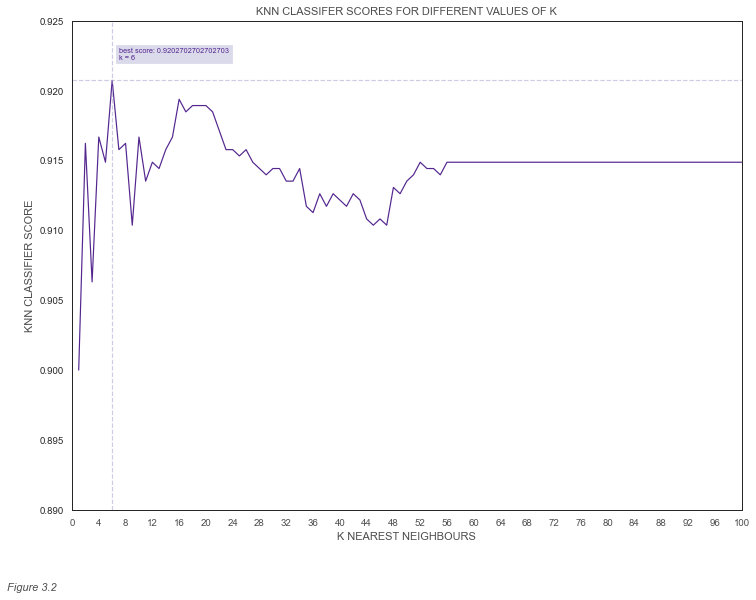

In [171]:
knn_scores(scores2, best_k2, max_score2, figure = 3.2)

### NATURAL LANGUAGE PROCESSING
#### <u>Text Processing</u>

There are multiple unique languages in this tweets dataset:
['en' 'tl' 'ja' 'fi' 'ko' 'und' 'nl' 'es' 'pt' 'in' 'ur' 'vi' 'it' 'th'
'ca' 'fr' 'ru' 'el' 'ar' 'pl' 'ro' 'tr' 'sl' 'de' 'zh' 'fa' 'sv' 'et'
'hi' 'ht']

or, ['english', 'tagalog', 'japanese', 'finnish', 'korean', 'undefined',
     'dutch', 'spanish', 'portuguese', 'indonesian', 'urdu', 'vietnamese',
     'italian', 'thai', 'czech', 'french', 'russian', 'greek', 'arabic',
     'polish', 'romanian', 'turkish', 'slovenian', 'german', 'chinese',
     'persian', 'swedish', 'estonian', 'hindi', 'haitian creole']

Out of the is_viral_followers_factor == 1 subset (the dataset we are analysing), 96.6% of the tweets are in the English language. For simplicity's sake, at this stage, all other languages will be ignored.

In [486]:
#print(all_tweets.lang.unique())
print(len(all_tweets[(all_tweets.lang == 'en') & (all_tweets.is_viral_followers_factor == 1)])/len(all_tweets[all_tweets.is_viral_followers_factor == 1])*100)


#noise removal (removing formatting, punctiation, special characters, digits, whitespace)
#and lower/uppercase normalisation:

import re

def noise_removal(dataframe):
    noise_removed = []
    for i in range(len(dataframe)):
        if dataframe.lang[i] == 'en':
            clean_tweet = []
            for word in dataframe.no_hashtags_links_mentions[i]:
                clean_word = re.sub(r'(?<!\w)\W+|\W+(?!\w)', '', word)
                clean_word = re.sub(r'[0-9_,‘“‘¨´˙˜`//]', '', clean_word)
                if '’' in clean_word:
                    clean_word = clean_word.replace('’', "'")
                if clean_word != '':
                    clean_tweet.append(clean_word.lower())
            noise_removed.append(clean_tweet)
        else:
            noise_removed.append(np.nan)
    return noise_removed

all_tweets['noise_removed'] = noise_removal(all_tweets)
#this stopwords set also removes 'not', which is not suitable for sentiment analysis

#stopwords removal:
from nltk.corpus import stopwords

def stopwords_removal(column):
    stop_words = set(stopwords.words('english'))
    stop_words_removed = []
    for tweet in column:
        if type(tweet) != float:
            normalised_tweet = [word for word in tweet if word not in stop_words]
            stop_words_removed.append(normalised_tweet)
        else:
            stop_words_removed.append(np.nan)
    return stop_words_removed

all_tweets['stopwords_removed'] = stopwords_removal(all_tweets.noise_removed)
#print(stopwords.words())

#lemmatising:

from nltk.corpus import wordnet
from collections import Counter
from nltk.stem import WordNetLemmatizer

def get_part_of_speech(word):
    probable_pos = wordnet.synsets(word)
    pos_counts = Counter()
    
    pos_counts["n"] = len([item for item in probable_pos if item.pos() == "n"])
    pos_counts["v"] = len([item for item in probable_pos if item.pos() == "v"])
    pos_counts["a"] = len([item for item in probable_pos if item.pos() == "a"])
    pos_counts["r"] = len([item for item in probable_pos if item.pos() == "r"])
    
    most_likely_pos = pos_counts.most_common(1)[0][0]
    
    return most_likely_pos

def lemmatizer(column):
    lemmatizer = WordNetLemmatizer()
    lemmatized = []
    for tweet in column:
        if type(tweet) != float:
            lemmatized_tweet = [lemmatizer.lemmatize(word, get_part_of_speech(word)) for word in tweet]
            lemmatized.append(lemmatized_tweet)
        else:
            lemmatized_tweet = np.nan
            lemmatized.append(lemmatized_tweet)
    return lemmatized

all_tweets['lemmatized'] = lemmatizer(all_tweets.stopwords_removed)
#need to use a different part_of_speech tagger. NLTK is not accurate.

for i in range(10):
    print(all_tweets.stopwords_removed[i], '\n')
    print(all_tweets.lemmatized[i], '\n\n')

96.62790697674419
['month', 'summer', 'days', 'getting', 'shorter', 'sunrise', 'minutes', 'later', 'july'] 

['month', 'summer', 'day', 'get', 'short', 'sunrise', 'minute', 'late', 'july'] 


['thanks', 'love', 'feeling', 'eyes', 'get', 'nervous'] 

['thanks', 'love', 'feel', 'eye', 'get', 'nervous'] 


['pink', 'news', 'resignation', 'labour', 'councillor', 'understand', 'equality', 'act', 'eight', 'years', 'af'] 

['pink', 'news', 'resignation', 'labour', 'councillor', 'understand', 'equality', 'act', 'eight', 'year', 'af'] 


['one', 'reasons', 'need', 'great', 'border', 'security', "mexico's", 'murder', 'rate', 'increased', 'peopl'] 

['one', 'reason', 'need', 'great', 'border', 'security', "mexico's", 'murder', 'rate', 'increase', 'peopl'] 


['hearing', 'word', 'happen', 'stand', 'outside', 'door', 'following', 'distance', 'afraid', 'identified', 'w'] 

['hearing', 'word', 'happen', 'stand', 'outside', 'door', 'follow', 'distance', 'afraid', 'identify', 'w'] 


['torture', 'staff

### DISCUSSION AND EVALUATION

#### <u> Definition of ‘Viral’</u>

- The maximum retweet count in the dataset is 413,719 retweets.<br><br>
- The average retweet count in the dataset is 2,777.96 retweets.<br><br>
- The median retweet count is 13.<br><br>
- Number of tweets with retweet count over 100,000 is 24.<br><br>
- Figure 1.1 shows a KDE plot of retweet count, with a KDE spike almost at zero and some much smaller KDE remnants over the rest of the retweet count value, stretching over 400,000 retweets. <br><br>

- The above summary indicates that the vast majority of tweets have been retweeted a very low number of times. In the age of content amassing billions of views and millions of likes, intuitively, it can be said that only a modest handful of tweets in this dataset are truly ‘viral’.<br><br>

- However, working with a very small subset of the data might not be too fruitful, so a slightly looser, yet still reasonable definition of ‘viral tweet’ was chosen:<br>

	***“a viral tweet is one, which had been shared more than 10 times the user’s followers count, for followers count equal to or greater than 100.”***<br><br>

- This would mean that for a user with 100 followers, a tweet, which receives at least 1000 retweets, would be labeled ‘viral’.<br><br>

- This definition can be tweaked arbitrarily to find one, which gives the most powerful results, however, there is no immediate clue as to how much this should be tweaked, if at all.<br><br>

- There are three reasons why this definition was chosen:<br><br>

    1. For someone who has 3 followers, a tweet with 1000 retweets could be considered viral, while for someone who has 1 million followers, 1000 retweets could be considered as a less than popular tweet. Hence, the ‘virality’ of the tweet must in part depend on the user’s follower’s count.<br><br>

    2. There must be some base level, non-zero followers count, predominantly because the vast majority of users have a followers count of zero or close to zero, which would give a very low threshold for their tweet to be labeled ‘viral’. The minimum followers count = 100 was chosen arbitrarily.<br><br>

    3. This definition yielded 860 viral tweets out of the 11099 total. Tightening the criteria further would further restrict the data and potentially limit the ability of the KNN model to learn effectively (underfitting).<br><br>

- From here onwards, ‘viral tweet’ will be labeled as such according to this definition.

#### <u> Visualisations </u>

- Additional features were created to explore the data visually.<br><br>

- Figure 2.1 shows a scatter plot of user followers count vs retweet count. Visually, a loose positive trend exists, however, analytically, the correlation coefficient was determined to be very small at 0.2914, indicating a very weak positive relationship between the two features.<br><br>

- Figures 2.2, 2.3, and 2.4 show bar charts of average retweet count by number of hashtags, number of links, and number of user mentions in viral tweets respectively. It can be seen that the viral tweets with the highest retweet count tend to have zero hashtags, one link, and one user mention.

#### <u> KNN Classifier </u>

- The viral tweets labels and features ['user_followers_count', 'user_friends_count', 'full_character_count', 'num_of_words', 'num_of_hashtags', 'num_of_links', 'num_of_user_mentions’] were isolated into separate labels and features datasets.<br><br>
- Figure 3.1 shows how the value of KNN accuracy score varies with ’k’ nearest neighbours. The peak score value happens at k = 16 and is 0.9157657657657657 when all of the features are included in the analysis, indicating that these features account for 91.58% of this KNN model’s predictive power.<br><br>
- Upon further investigation, it was discovered that the peak score value can be increased further by excluding user_friends_count feature from the model. In this case, the peak score value happens at k = 6 and is 0.9202702702702703, gaining 0.45% on the previous value, as can be seen in Figure 3.2.<br><br>
- This was the highest possible score value for all possible combinations of the selected features.<br><br>
- 92.03% accuracy is good, but it is not as high as the desired 95% accuracy. Further analysis is needed, possibly of the language used in tweets, to be able to determine ‘viral’ tweets with greater accuracy.

#### <u> Natural Language </u>

- There are multiple languages found in this tweets dataset:<br>

['english', 'tagalog', 'japanese', 'finnish', 'korean', 'undefined', 'dutch', 'spanish', 'portuguese', 'indonesian', 'urdu', 'vietnamese', 'italian', 'thai', 'czech', 'french', 'russian', 'greek', 'arabic', 'polish', 'romanian', 'turkish', 'slovenian', 'german', 'chinese', 'persian', 'swedish', 'estonian', 'hindi', 'haitian creole']<br>

- However, those which are in English comprise 95.71% of the total dataset and 96.63% of the viral tweets subset. It was decided that for the initial analysis, the focus will be only on the English tweets.<br><br>

^^^ UNFINISHED SECTION 

### CONCLUSIONS

- The maximum retweet count in the dataset is 413,719 with the average being 2,77.96 retweets. The median retweet count is 13. The number of tweets with a retweet count over 100,000 is 24.<br><br>
- For a definition of ‘viral’ - ‘a tweet, which has been shared more than 10 times the user’s followers count, for followers count equal to or greater than 100’, there were 860 tweets, which were labeled ‘viral’.<br><br>
- There was a weak-positive to no statistically significant correlation between a user’s followers count and the retweet count they receive on their tweet, with Pearson’s correlation coefficient = 0.2914.<br><br>
- Viral tweets with the highest average retweet count tend to have one or more of the following characteristics: zero hashtags, one link, and/ or one user mention.<br><br>
- Using features: ['user_followers_count', 'full_character_count', 'num_of_words', 'num_of_hashtags', 'num_of_links', 'num_of_user_mentions’], a KNN model accuracy score of 92.03% for k = 6 was achieved. This was the highest possible score for all possible combinations of selected features.